In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 hr_data=pd.read_csv("train.csv")   

In [3]:
hr=hr_data
col_name=hr.columns.tolist()
print("COLUMNS_NAME")
print(col_name)
print("Toal Number of columns")
print(len(col_name ))

print("DATA SHAPE")
print(hr.shape)

COLUMNS_NAME
['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary', 'Attrition']
Toal Number of columns
10
DATA SHAPE
(25491, 10)


In [4]:
# rename the DEPARTMENT column to department
hr=hr.rename(columns={"Department":"department"})

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   department              25491 non-null  object 
 8   salary                  25491 non-null  object 
 9   Attrition               25491 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [6]:
print("Data Types of each column")
hr.dtypes

Data Types of each column


satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
department                 object
salary                     object
Attrition                   int64
dtype: object

In [7]:
cols=["department","salary"]
hr[cols] = hr[cols].astype('object')

In [8]:
hr.dtypes

satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
department                 object
salary                     object
Attrition                   int64
dtype: object

In [9]:
# check for missing values
print("Total number of missing values in each column")
print(hr.isnull().sum())

Total number of missing values in each column
satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
department                0
salary                    0
Attrition                 0
dtype: int64


In [10]:
# use to to get boolien answer for each column 
hr.isnull().any()

satisfaction_level        False
last_evaluation_rating    False
projects_worked_on        False
average_montly_hours      False
time_spend_company        False
Work_accident             False
promotion_last_5years     False
department                False
salary                    False
Attrition                 False
dtype: bool

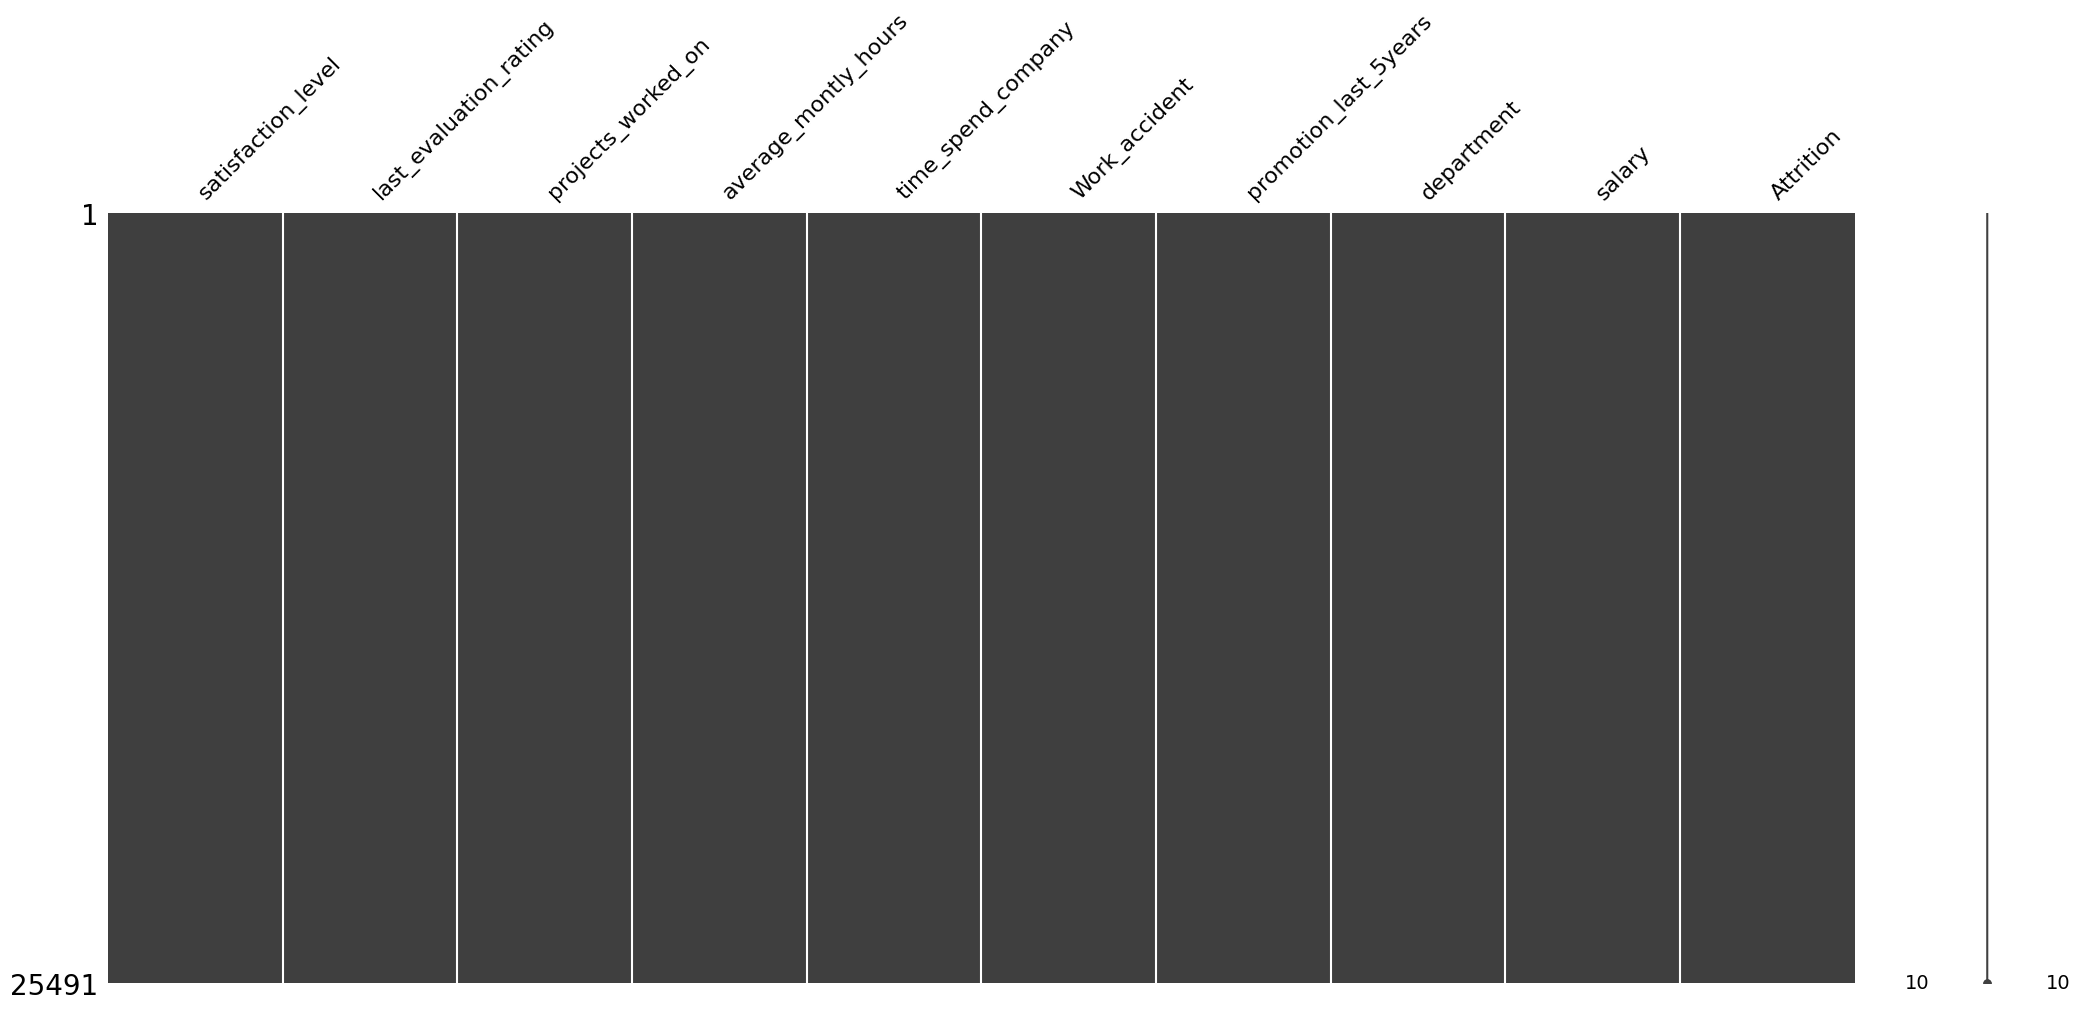

In [11]:
import missingno as ms
ms.matrix(hr)
plt.show()

In [12]:
hr.describe()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.021419,0.234985
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.144780,0.423998
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
# lets see the unique value for department and salary column
print(hr['department'].unique())
print(hr["department"].nunique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
10


In [14]:
hr['salary'].unique()
print(hr['salary'].value_counts())

salary
low       12403
medium    10962
high       2126
Name: count, dtype: int64


In [15]:
# replace support with technica
hr['department']=np.where(hr['department']=='support','technical',hr['department'])

In [16]:
#replace IT with technical
hr['department']=hr['department'].replace('IT','technical')

In [17]:
hr['department'].nunique()

8

In [18]:
#DATA EXPLORATION

In [19]:
hr["Attrition"].value_counts()

Attrition
0    19501
1     5990
Name: count, dtype: int64

In [20]:
# compute means for numeric columns only

hr.groupby('Attrition').mean(numeric_only=True)

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Attrition,,,,,,,
0,6.668899,7.159582,4.198041,203.199836,3.378647,0.176247,0.026665
1,4.408347,7.194691,4.270952,212.081302,3.882972,0.047579,0.004341


In [21]:
hr.groupby("department").mean(numeric_only=True)

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
department,,,,,,,,
RandD,6.186966,7.095356,4.250936,204.902622,3.361049,0.173783,0.034457,0.153558
accounting,5.835790,7.193845,4.224924,205.725684,3.530395,0.127660,0.018237,0.265957
hr,6.037272,7.072720,4.078509,203.311657,3.357653,0.122125,0.021412,0.283902
management,6.218932,7.247423,4.262418,205.244611,4.299906,0.160262,0.111528,0.134958
marketing,6.200756,7.165430,4.087973,203.987629,3.578694,0.158763,0.050172,0.229553
product_mng,6.200727,7.185535,4.223910,203.686262,3.456407,0.149934,0.000000,0.218626
sales,6.164850,7.110125,4.183995,205.039581,3.541804,0.143984,0.023519,0.240212
technical,6.137237,7.212923,4.257805,206.091864,3.410974,0.145222,0.008798,0.245317


In [22]:
hr.groupby("salary").mean(numeric_only=True)

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
salary,,,,,,,,
high,6.386124,7.049012,4.170743,203.784102,3.686736,0.153340,0.060207,0.066792
low,6.019963,7.180714,4.215674,205.429090,3.441506,0.144884,0.008385,0.291945
medium,6.222742,7.176300,4.223226,205.417351,3.523353,0.145868,0.028644,0.203156


In [23]:
#DATA VISUALIZATION


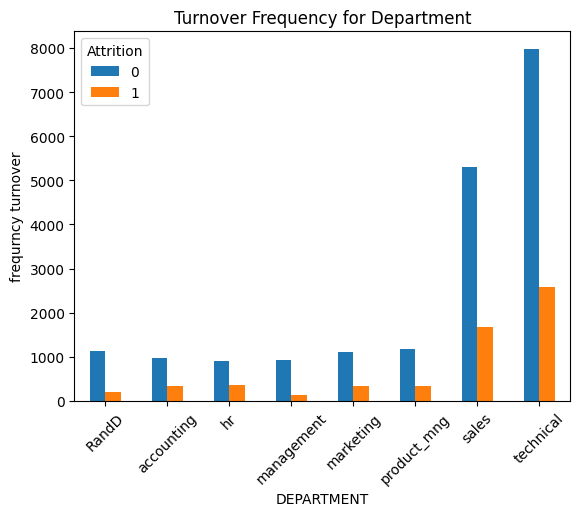

In [24]:
pd.crosstab(hr["department"],hr["Attrition"]).plot(kind='bar')
plt.title("Turnover Frequency for Department")
plt.xlabel("DEPARTMENT")
plt.ylabel("frequrncy turnover")
plt.xticks(rotation=45)

plt.show()

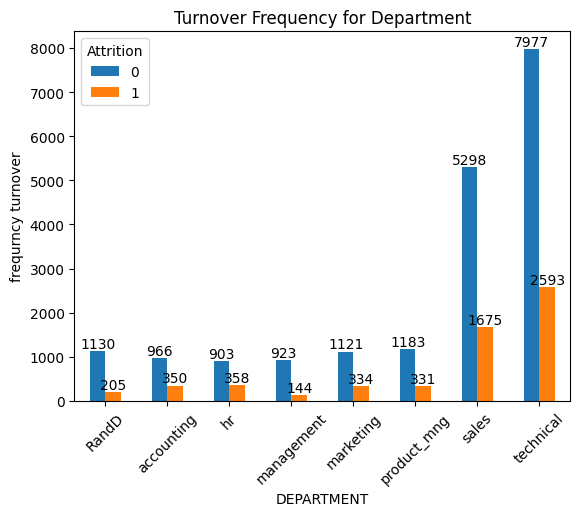

In [25]:
ct=pd.crosstab(hr["department"],hr["Attrition"])
ax=ct.plot(kind='bar')
plt.title("Turnover Frequency for Department")
plt.xlabel("DEPARTMENT")
plt.ylabel("frequrncy turnover")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

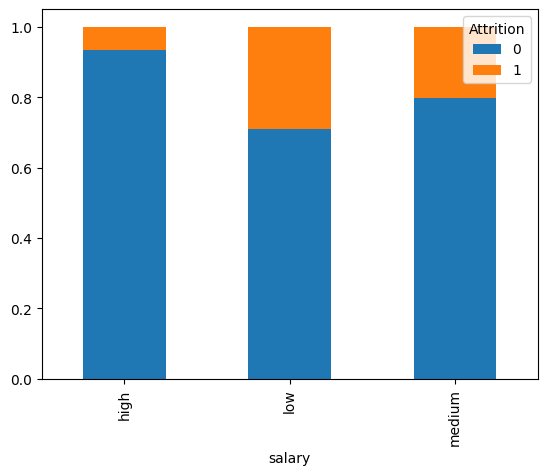

In [26]:
# bar chart for employee salary level and frequecy of turnover
table=pd.crosstab(hr.salary,hr.Attrition)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()



Attrition       0     1
department             
RandD        1130   205
accounting    966   350
hr            903   358
management    923   144
marketing    1121   334
product_mng  1183   331
sales        5298  1675
technical    7977  2593


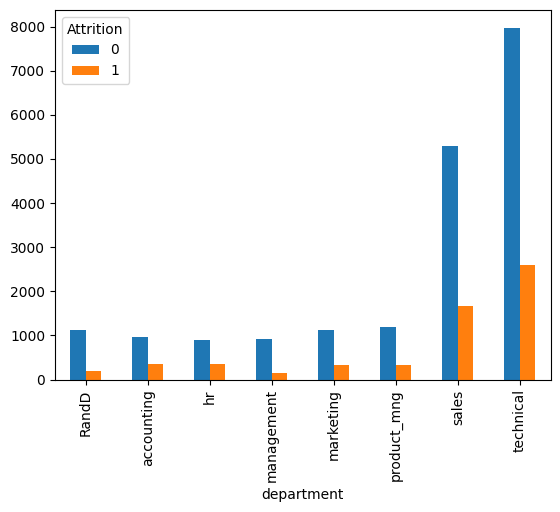

In [27]:
# proportion of employee left by department 
print(pd.crosstab(hr.department,hr.Attrition))

pd.crosstab(hr.department,hr.Attrition).plot(kind='bar')
plt.show()

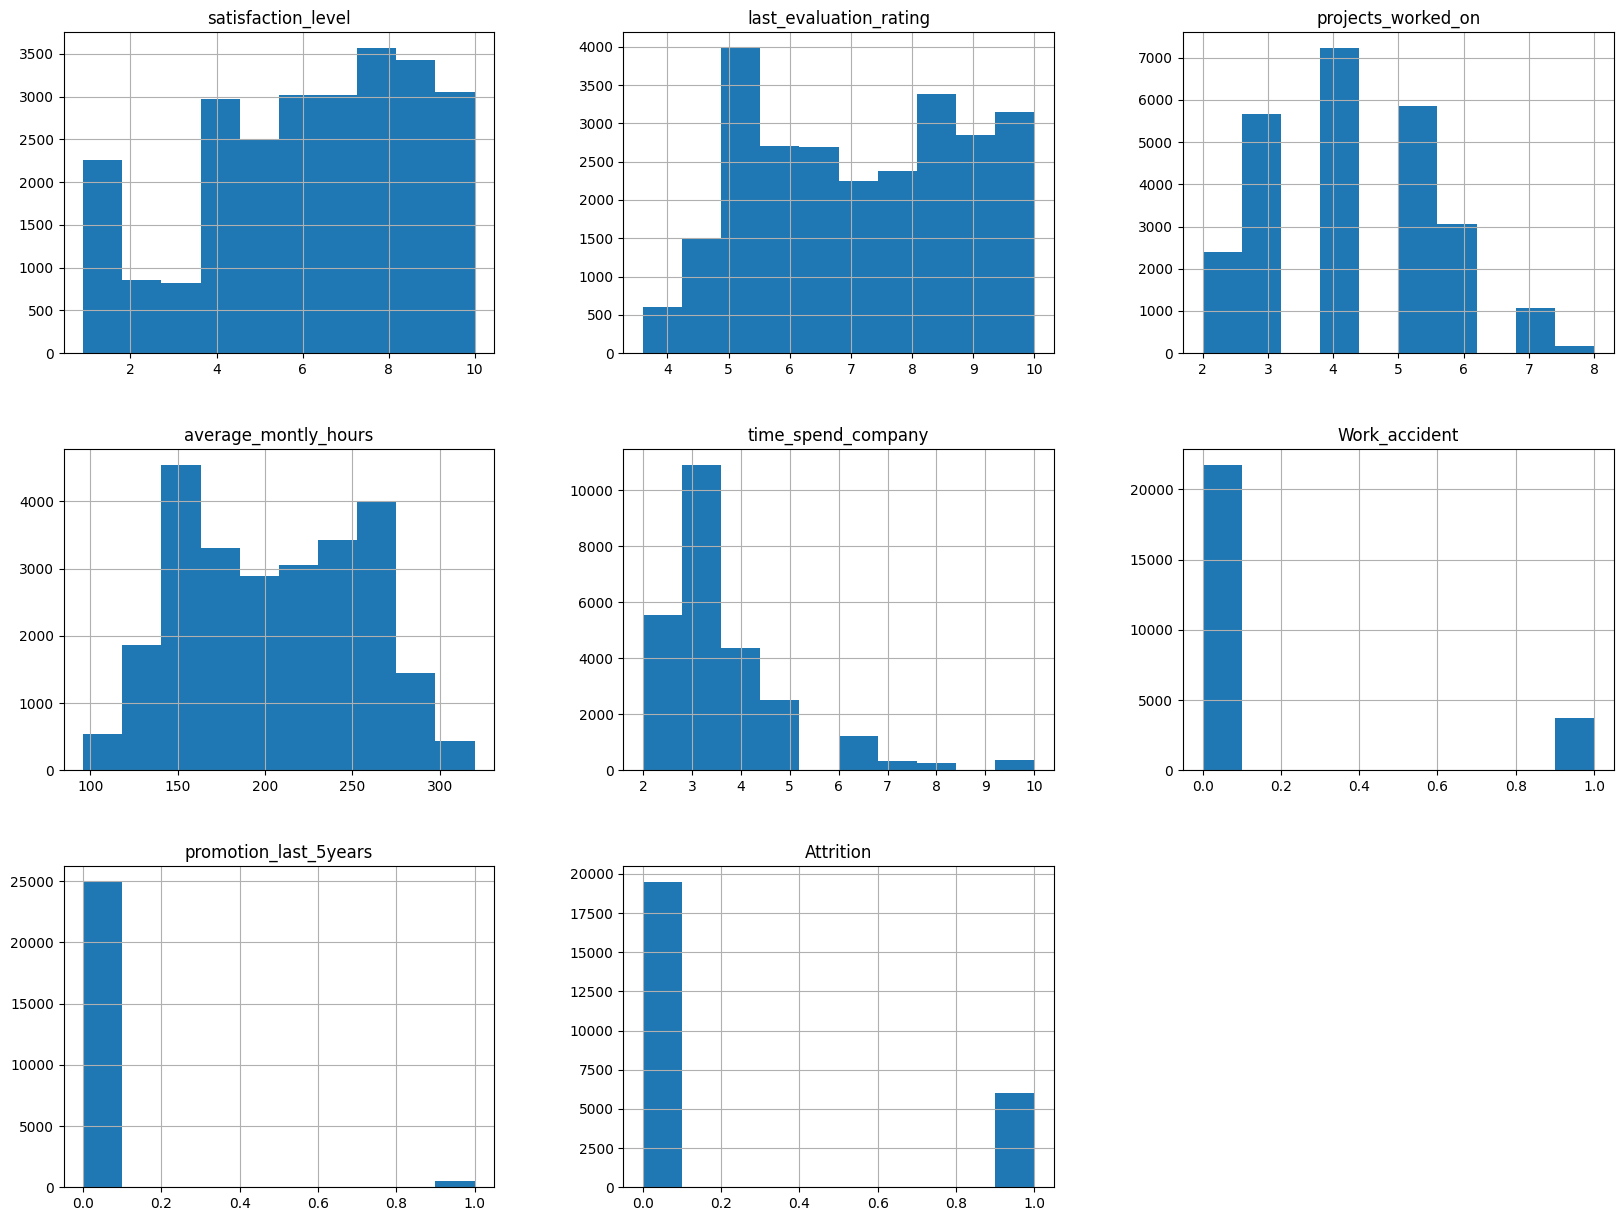

In [28]:
# lets see the histogram for numeric bins to get an idea of distribution 

hr.hist(bins=10,figsize=(20,15))
plt.show()

In [29]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [30]:
hr["department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [31]:
# lets encoded the deparment and salary using one hot encoding 

hr1=pd.get_dummies(hr,columns=["department","salary"],dtype=int)



In [32]:
hr=hr1

In [33]:
hr.shape

(25491, 19)

In [34]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,8.0,8.6,6,272,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1.1,8.8,8,282,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,3.7,5.2,3,169,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,4.1,5.0,3,163,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [35]:
# Split the data set in X and y (independendent and Target Variable)
X=hr.drop("Attrition",axis=1)
y=hr["Attrition"]

In [36]:
#FEATURE SELECTION
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
rfe= RFE(estimator=model,n_features_to_select=10)
rfe =rfe.fit(X,y)
print(rfe.ranking_)
print(rfe.support_)


c:\Users\Lenovo\Desktop\deployment\employee atrition\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\Desktop\deployment\employee atrition\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https

[1 3 2 9 1 1 1 1 4 1 1 6 8 7 5 1 1 1]
[ True False False False  True  True  True  True False  True  True False
 False False False  True  True  True]


In [37]:
X.columns[rfe.support_]

Index(['satisfaction_level', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_RandD', 'department_hr',
       'department_management', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [38]:
# lets store the above feature in x variable 
cols=['satisfaction_level', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_RandD', 'department_hr',
       'department_management', 'salary_high', 'salary_low', 'salary_medium']
X=hr[cols]
y=hr["Attrition"]


In [39]:
# MODEL BUILDING 

In [40]:
# TRAIN TEST SPLIT 
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

MODEL 1 LOGISTIC REGRESSION (LOGREG)

In [42]:
# model 1 LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [43]:
# model 1 LOGREG
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [44]:
y_pred=logreg.predict(X_test)

In [45]:
pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

,y_test,y_pred
6916,0,0
2346,0,0
3594,0,0
8229,0,1
23335,0,0
...,...,...
128,1,1
2932,0,0
17119,0,0
23330,0,0


In [46]:
# Calculate the aaccuracy of the model
from sklearn.metrics import accuracy_score
print("ACCURACY OF THE MODEL:",round(accuracy_score(y_test,y_pred),2))

# PRINT THE WHOLE CONFUSION MATIRX
CM=confusion_matrix(y_test,y_pred)
print(CM)

ACCURACY OF THE MODEL: 0.77
[[5438  442]
 [1293  475]]


In [47]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      5880
           1       0.52      0.27      0.35      1768

    accuracy                           0.77      7648
   macro avg       0.66      0.60      0.61      7648
weighted avg       0.74      0.77      0.74      7648



MODEL 2 RANDOM FOREST 

In [48]:
# import random forest from ensemble learning 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [49]:
y_pred1=rf.predict(X_test)

In [50]:
pd.DataFrame({"y_test":y_test,"y_pred1":y_pred1})

,y_test,y_pred1
6916,0,0
2346,0,0
3594,0,0
8229,0,0
23335,0,0
...,...,...
128,1,1
2932,0,0
17119,0,0
23330,0,0


In [51]:
# lets evaluate the random forest model
print("Confusion Matrix")
cm1=confusion_matrix(y_test,y_pred1)
print(cm1)
print("Accuracy of Random forest classifier")
print(round(accuracy_score(y_test,y_pred1),2))

Confusion Matrix
[[5737  143]
 [ 112 1656]]
Accuracy of Random forest classifier
0.97


In [52]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5880
           1       0.92      0.94      0.93      1768

    accuracy                           0.97      7648
   macro avg       0.95      0.96      0.95      7648
weighted avg       0.97      0.97      0.97      7648



    MODEL 3  support vector classifier (SVC)

In [53]:
# SVC
from sklearn.svm import SVC

sv=SVC()
sv.fit(X_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [54]:
y_pred2=sv.predict(X_test)

In [55]:
pd.DataFrame({"y_test":y_test,"y_pred2":y_pred2})

,y_test,y_pred2
6916,0,0
2346,0,0
3594,0,1
8229,0,1
23335,0,0
...,...,...
128,1,1
2932,0,0
17119,0,0
23330,0,0


In [56]:
# accuracy of the model SVC
print("Accuracy of SVCmodel")
print(round(accuracy_score(y_test,y_pred2),2))
print("Confusion Matrix of SVC")
print(confusion_matrix(y_test,y_pred2))

Accuracy of SVCmodel
0.89
Confusion Matrix of SVC
[[5393  487]
 [ 342 1426]]


MODEL 3 XGBOOST CLASSIFIER

In [57]:
from xgboost import XGBClassifier

In [58]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [59]:
y_pred3=XGB.predict(X_test)
pd.DataFrame({"y_test":y_test,"y_ored3":y_pred3})

,y_test,y_ored3
6916,0,0
2346,0,0
3594,0,0
8229,0,0
23335,0,0
...,...,...
128,1,1
2932,0,0
17119,0,0
23330,0,0


In [60]:
#ACCURACY OF THE XGB MODEL
print("Accuray of the model ")
print(round(accuracy_score(y_test,y_pred3),2))


Accuray of the model 
0.96


In [61]:
# K-FOLD CV FOR RANDOM FOREST CLASSIFIER 

In [62]:
# Lets check whether the Random Forest Classifier is overfiiting or not using K-Fold CV 

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [63]:
kfold=model_selection.KFold(n_splits=10,shuffle=True,random_state=42)
modelCV=RandomForestClassifier()
scoring='accuracy'
result=model_selection.cross_val_score(modelCV,X,y,cv=kfold,scoring=scoring)
print("cross validation average accuracy for Random Forest Classifier: %.3f" % (result.mean()))


cross validation average accuracy for Random Forest Classifier: 0.964


In [64]:
#For SVM
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=7)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

cross validation average accuracy for SVM Classifier: 0.889


In [65]:
#For XGBoost
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=7)
modelCV = XGBClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for XGBoost Classifier: %.3f" % (results.mean()))

cross validation average accuracy for XGBoost Classifier: 0.961


## save random forest classifier into pickle format to make a model ready for deployment

In [66]:
import joblib
joblib.dump(rf,"employee_attrition_rf_model.pkl")

['employee_attrition_rf_model.pkl']

# As we have selected the RANDOM FOREST MODEL LETS VISUALIZE THE CONFUSION MATRIX IN SEABORN

In [74]:
import seaborn as sns

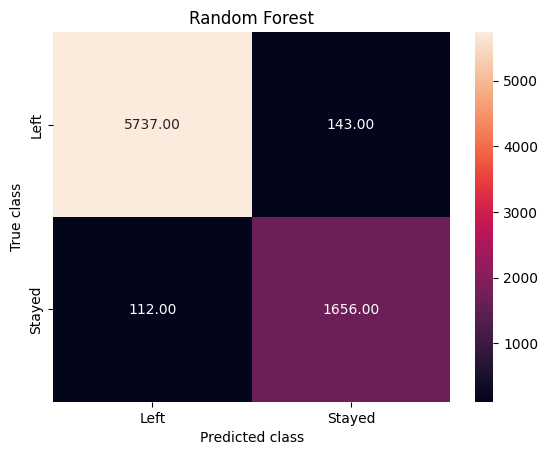

In [75]:
#Confusion Matrix for Random Forest
sns.heatmap(cm1, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

lets calculate the VARIABLE importance of random forest model 

In [94]:
feature_importance=rf.feature_importances_
feature_importance_df=pd.DataFrame({"feature":X.columns,"importance":(feature_importance*100)})
feature_importance_df



,feature,importance
0,satisfaction_level,60.243112
1,time_spend_company,33.665001
2,Work_accident,2.176261
3,promotion_last_5years,0.427851
4,department_RandD,0.438922
5,department_hr,0.391126
6,department_management,0.344295
7,salary_high,0.793386
8,salary_low,1.102900
9,salary_medium,0.417145
